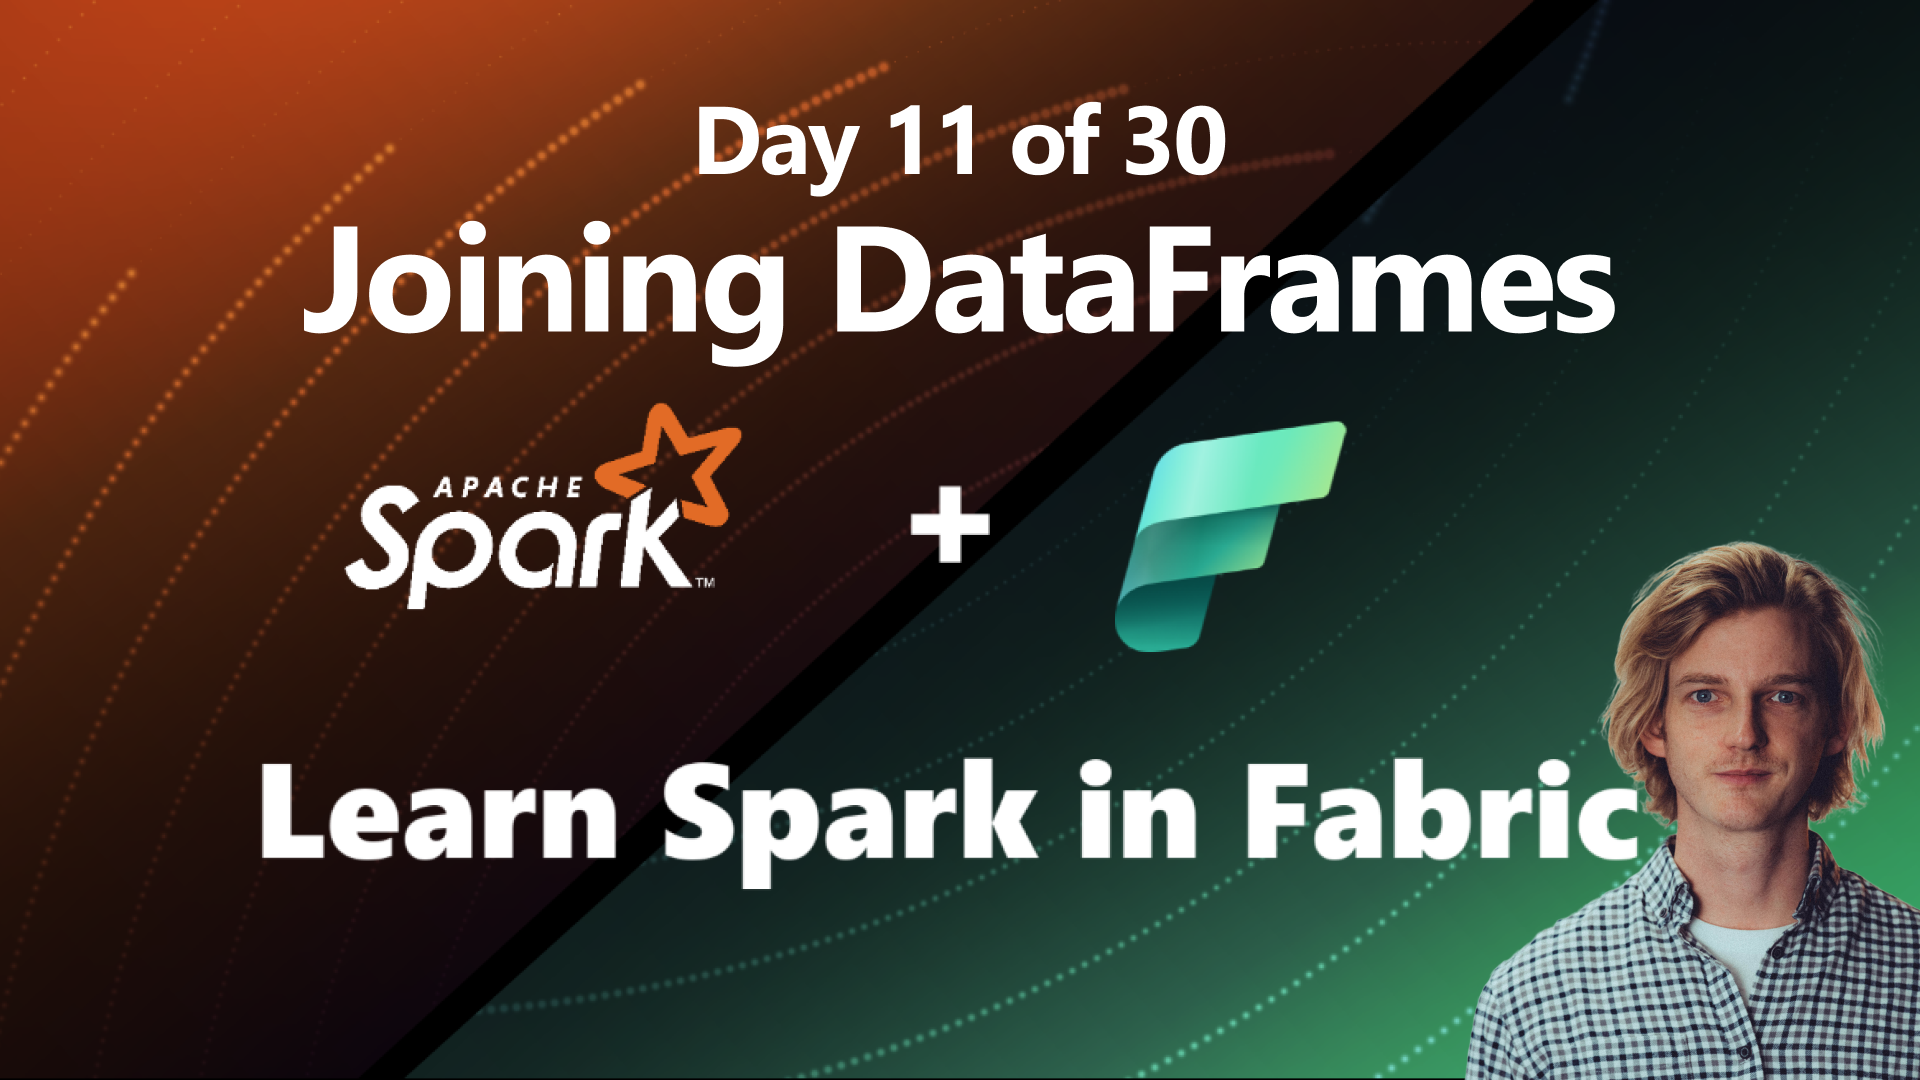

#### Let's get one DataFrame to begin with

In [1]:
# we'll get the propertysales table - FACT
sales_fact_df = spark.sql("SELECT * FROM SparkSeptember.propertysales")
sales_fact_df.show()

StatementMeta(, 9e7b83a3-74fd-4576-9ee4-1af59bfaa3f3, 3, Finished, Available)

+-------------------+-----------------+-----------+-------------+--------------+
|            Address|            Agent|       City|SalePrice_USD|          Type|
+-------------------+-----------------+-----------+-------------+--------------+
|   1 Rowley Street |Penelope Pullman |   New York|       745000|Detached House|
|13a lollipop avenue|      Jack Smith |Los Angeles|       345000|     Apartment|
|       34 the drive|     Sheila Sammi|    Atlanta|       459000|         House|
+-------------------+-----------------+-----------+-------------+--------------+



#### Let's make a Dimension table

In [2]:
cities_data = [(1,"New York","USA"), \
    (2,"Los Angeles","USA"), \
    (3,"London","UK"), \
    (4,"Atlanta","USA"), \
    (5,"Dublin","Ireland")
  ]
cites_columns = ["city_uid","city_name","country"]

city_dimension_df = spark.createDataFrame(data=cities_data, schema = cites_columns)
city_dimension_df.show()

StatementMeta(, 9e7b83a3-74fd-4576-9ee4-1af59bfaa3f3, 4, Finished, Available)

+--------+-----------+-------+
|city_uid|  city_name|country|
+--------+-----------+-------+
|       1|   New York|    USA|
|       2|Los Angeles|    USA|
|       3|     London|     UK|
|       4|    Atlanta|    USA|
|       5|     Dublin|Ireland|
+--------+-----------+-------+



#### Join the Sales fact table and the city dimension table

Here's [the official pySpark documentation for the Join](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.DataFrame.join.html)


Generic structure of a join statement: 

**first_df.join(second_df, first_df.ColumnNameOnWhichToJoin ==  second_df.ColumnNameOnWhichToJoin, join_type)**

Join types available: 
default inner. Must be one of: inner, cross, outer, full, fullouter, full_outer, left, leftouter, left_outer, right, rightouter, right_outer, semi, leftsemi, left_semi, anti, leftanti and left_anti.

In [3]:
# inner join 
sales_fact_df.join(city_dimension_df,sales_fact_df.City == city_dimension_df.city_name, "inner") \
    .show()

StatementMeta(, 9e7b83a3-74fd-4576-9ee4-1af59bfaa3f3, 5, Finished, Available)

+-------------------+-----------------+-----------+-------------+--------------+--------+-----------+-------+
|            Address|            Agent|       City|SalePrice_USD|          Type|city_uid|  city_name|country|
+-------------------+-----------------+-----------+-------------+--------------+--------+-----------+-------+
|   1 Rowley Street |Penelope Pullman |   New York|       745000|Detached House|       1|   New York|    USA|
|13a lollipop avenue|      Jack Smith |Los Angeles|       345000|     Apartment|       2|Los Angeles|    USA|
|       34 the drive|     Sheila Sammi|    Atlanta|       459000|         House|       4|    Atlanta|    USA|
+-------------------+-----------------+-----------+-------------+--------------+--------+-----------+-------+



In [4]:
# same, but removing some of the columns we don't want  
sales_fact_df.join(city_dimension_df,sales_fact_df.City == city_dimension_df.city_name, "inner") \
    .drop(*('city_uid', 'city_name'))\
    .show()

StatementMeta(, 9e7b83a3-74fd-4576-9ee4-1af59bfaa3f3, 6, Finished, Available)

+-------------------+-----------------+-----------+-------------+--------------+-------+
|            Address|            Agent|       City|SalePrice_USD|          Type|country|
+-------------------+-----------------+-----------+-------------+--------------+-------+
|   1 Rowley Street |Penelope Pullman |   New York|       745000|Detached House|    USA|
|13a lollipop avenue|      Jack Smith |Los Angeles|       345000|     Apartment|    USA|
|       34 the drive|     Sheila Sammi|    Atlanta|       459000|         House|    USA|
+-------------------+-----------------+-----------+-------------+--------------+-------+



#### Joining revision
What do each of these do? 

**First one to answer in the comments gets absolutely nothing, but my respect and a well done.** 😂    

- inner: 
- cross: 
- outer: 
- full: 
- fullouter: 
- full_outer:
- left: 
- leftouter:
- left_outer:
- right:
- rightouter:
- right_outer:
- semi:
- leftsemi:
- left_semi:
- anti:
- leftanti:
- left_anti:

---
#### Your final tasks: 

✅ View this notebook and all others in this series on GitHub. 

✅ Leave a comment below

✅ Subscribe 

✅ Like